## Question: What features are important for predicting the death rate of the covid-19?
## Hypothesis: Underlying health conditions, financial well-being, age, bad living habits and quality of healthcare will affect death rate.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [43]:
pd.set_option('display.max_columns', None)

# 0.Data Cleaning

In [44]:
# Note: data downloaded from Yu group Github on 5/7/20
demo = pd.read_csv('data/county_data_abridged.csv')
demo.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,1498

In [45]:
# Note: data downloaded from CSSE Github on 5/7/20
infections = pd.read_csv('data/05-06-2020.csv')
infections.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128
1,Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN
2,American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN
3,Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637
4,Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001


In [46]:
# Note: data downloaded from CSSE Github on 5/7/20
deaths = pd.read_csv('data/time_series_covid19_deaths_US.csv')
deaths.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60,62,63,64,63,69,77,83,84,84,86,86,92,94,95,97,97,99,99,102
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,2,2,2,2,2,3,4,4,4,3,3,3,3,3,3,3
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,5,5,5
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [47]:
# Note: data downloaded from CSSE Github on 5/7/20
cases = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
cases.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181,187,188,189,196,205
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33,35,37,37,39,42,43,45,45,47,47,51
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26,28,32,32,34,33

In [48]:
demo.shape

(3244, 87)

In [49]:
demo.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [50]:
demo.iloc[:, :14].isna().sum()

countyFIPS                        0
STATEFP                          23
COUNTYFP                         23
CountyName                        0
StateName                         0
State                           169
lat                             169
lon                             169
POP_LATITUDE                     23
POP_LONGITUDE                    23
CensusRegionName                 98
CensusDivisionName               98
Rural-UrbanContinuumCode2013     24
PopulationEstimate2018           23
dtype: int64

In [51]:
deaths.iloc[:, :14].isna().sum()

UID                0
iso2               0
iso3               0
code3              0
FIPS              10
Admin2             7
Province_State     0
Country_Region     0
Lat                0
Long_              0
Combined_Key       0
Population         0
1/22/20            0
1/23/20            0
dtype: int64

In [52]:
deaths.shape

(3261, 119)

In [53]:
deaths[deaths['FIPS'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",488943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,5,7,7,8,8,8,8,12,12,12,13,13,13,13,13,13,14,15,15,15,15,16,16,16,16,16,16,16,16,16,16
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,12,12,15,17,17,19,20,25,28,28,31,32,37,38,41,42,42,42,42,45,48,48,50
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,3
3255,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3260,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"

In [54]:
# dropping these 10 rows out of 3261 total should not bias our analysis later on
deaths['FIPS'] = deaths['FIPS'].fillna(-1).astype(int)

In [55]:
cases.iloc[:, :14].isna().sum()

UID                0
iso2               0
iso3               0
code3              0
FIPS              10
Admin2             7
Province_State     0
Country_Region     0
Lat                0
Long_              0
Combined_Key       0
1/22/20            0
1/23/20            0
1/24/20            0
dtype: int64

In [56]:
cases['FIPS'] = cases['FIPS'].fillna(-1).astype(int)

In [57]:
demo['countyFIPS'].str.isnumeric().value_counts()

True     3242
False       2
Name: countyFIPS, dtype: int64

In [58]:
demo.iloc[-2:]

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3243,City2,NaN,NaN,Kansas City,MO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# since there appears to be no info for these 2 rows, we will drop them
demo = demo.iloc[:-2]
demo['countyFIPS'].str.isnumeric().value_counts()

True    3242
Name: countyFIPS, dtype: int64

In [60]:
demo['FIPS'] = demo['countyFIPS'].astype(int)

In [61]:
# now we can merge demo data with ts data on FIPS
print(len(deaths), len(cases))
deaths = deaths.merge(demo, on = 'FIPS')
cases = cases.merge(demo, on = 'FIPS')
print(len(deaths), len(cases))


3261 3261
3140 3140


# 1.Death Rate Prediction

## 1.1 Death Rate Analysis

In [62]:
death_rate = 100*deaths['5/6/20']/cases['5/6/20'].fillna(0) # we count places with no cases as a 0 death rate

In [63]:
print('average mortality rate:', death_rate.mean())
print('varaince in mortality rate:', death_rate.var())
print('max mortality rate:', death_rate.max())
print('min mortality rate:', death_rate.min())

average mortality rate: 3.612419113481636
varaince in mortality rate: 41.74665295054812
max mortality rate: 100.0
min mortality rate: 0.0


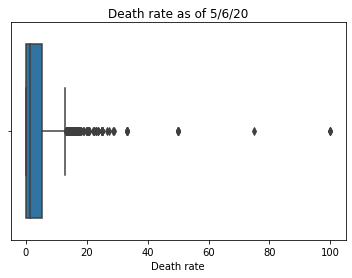

In [64]:
sns.boxplot(death_rate)
plt.title('Death rate as of 5/6/20')
plt.xlabel('Death rate');

This box plot shows that there are quite a few outliers in the dataset, which should be investigated further.

In [65]:
death_rate[death_rate > 20].count()

55

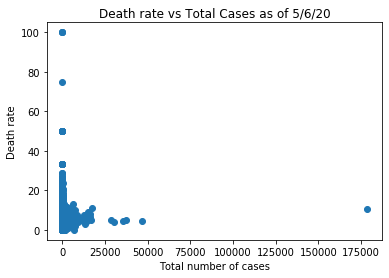

In [66]:
plt.scatter(cases['5/6/20'], death_rate)
plt.title('Death rate vs Total Cases as of 5/6/20')
plt.xlabel('Total number of cases')
plt.ylabel('Death rate');

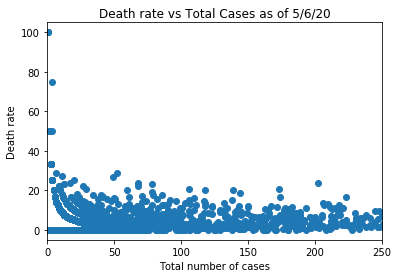

In [67]:
plt.scatter(cases['5/6/20'], death_rate)
plt.xlim([0, 250])
plt.title('Death rate vs Total Cases as of 5/6/20')
plt.xlabel('Total number of cases')
plt.ylabel('Death rate');

In [68]:
(cases['5/6/20'] > 50).sum()

1099

As we can see, all the places with very a high death rate also have a low total case count. One possible explanation for this is that places are likely to be undercounting cases when Covid first arrives in that area. This phenomenon is well visualized by Tomas Pueyo in this Medium article: https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca. Thus, we decide to only analyze counties with total case counts greater than 50. This limits our study to a little more than a third of U.S. counties; howerver, we feel that this data will have much more reliable death rate figures.

In [69]:
cases['death_rate'] = death_rate
cases = cases.rename(columns = {'5/6/20' : 'cur_cases'})

In [70]:
cases_filtered = cases[cases['cur_cases'] > 50]

In [71]:
cases.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       'public schools', 'restaurant dine-in', 'entertainment/gym',
       'federal guidelines', 'foreign travel ban', 'SVIPercentile',
       'HPSAShortage', 'HPSAServedPop', 'HPSAUnderservedPop', 'death_rate'],
      dtype='object', length=206)

In [72]:
income = pd.read_excel('data/Unemployment.xls', header = 4)
income.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,Unemployed_2012,Unemployment_rate_2012,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,153761095.0,144860350.0,8900745.0,5.8,153825455.0,139594698.0,14230757.0,9.3,154270732.0,139408204.0,14862528.0,9.63,154606316.0,140765809.0,13840507.0,8.95,155119195.0,142600402.0,12518793.0,8.07,155485692.0,144018151.0,11467541.0,7.38,155957297.0,146338305.0,9618992.0,6.17,156866585.0,148579026.0,8287559.0,5.28,158708795.0,150981151.0,7727644.0,4.87,160273906.0,153293830.0,6980076.0,4.36,161640488.0,155344043.0,6296445.0,3.9,61937.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,2176489.0,2053477.0,123012.0,5.7,2162999.0,1924747.0,238252.0,11.0,2196042.0,1964559.0,231483.0,10.50,2202670.0,1990413.0,212257.0,9.60,2176337.0,2003290.0,173047.0,8.00,2174000.0,2017043.0,156957.0,7.20,2160842.0,2014290.0,146552.0,6.80,2158293.0,2026898.0,131395.0,6.10,2177209.0,2049971.0,127238.0,5.80,2178243.0,2081676.0,96567.0,4.40,2198837.0,2112347.0,86490.0,3.9,49881.0,100.0000
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,24687.0,23420.0,1267.0,5.1,24703.0,22301.0,2402.0,9.7,25713.0,23431.0,2282.0,8.90,25836.0,23677.0,2159.0,8.40,25740.0,23961.0,1779.0,6.90,25810.0,24205.0,1605.0,6.20,25592.0,24097.0,1495.0,5.80,25613.0,24283.0,1330.0,5.20,25966.0,24645.0,1321.0,5.10,25972.0,24958.0,1014.0,3.90,25957.0,25015.0,942.0,3.6,59338.0,118.9591
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,83223.0,79372.0,3851.0,4.6,82451.0,74403.0,8048.0,9.8,83459.0,75120.0,8339.0,10.00,85045.0,77418.0,7627.0,9.00,84414.0,78065.0,6349.0,7.50,85280.0,79626.0,5654.0,6.60,86384.0,81083.0,5301.0,6.10,87741.0,82882.0,4859.0,5.50,90670.0,85839.0,4831.0,5.30,92090.0,88342.0,3748.0,4.10,93849.0,90456.0,3393.0,3.6,57588.0,115.4508
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,10161.0,9267.0,894.0,8.8,10003.0,8572.0,1431.0,14.3,10221.0,8959.0,1262.0,12.30,9849.0,8712.0,1137.0,11.50,9362.0,8283.0,1079.0,11.50,9099.0,8168.0,931.0,10.20,8845.0,7913.0,932.0,10.50,8613.0,7848.0,765.0,8.90,8417.0,7717.0,700.0,8.30,8317.0,7831.0,486.0,5.80,8373.0,7940.0,433.0,5.2,34382.0,68.9280


In [73]:
income = income[['FIPS', 'Median_Household_Income_2018']]
income

,FIPS,Median_Household_Income_2018
0,0,61937.0
1,1000,49881.0
2,1001,59338.0
3,1003,57588.0
4,1005,34382.0
...,...,...
3270,72145,NaN
3271,72147,NaN
3272,72149,NaN
3273,72151,NaN


In [74]:
income['FIPS'] = income['FIPS'].astype(int)

In [75]:
cases_filtered = cases_filtered.merge(income, on = 'FIPS')

## 1.2 Correlation of Different Features on Death Rate
Following are some scatters to check whether there is correlation between one feature and the death rate.

### 1.2.1 Correlation Check

In [76]:
import math
def plot_scatter(data, x_col, y_col, ax):
    ax.scatter(data[x_col], cases_filtered[y_col])
    ax.set_title(f'{x_col} vs {y_col} of 5/6/20')
    ax.set_xlabel(x_col)
    ax.set_ylabel(f'{y_col} as of 5/6/20')
    
def plat_scatter_ftr_list(data, ftr_list, y_col, ncols=3, figsize=(5, 5)):
    ncols = min(ncols, len(ftr_list))
    nrows = math.ceil(len(ftr_list)/ncols)
    figsize = (figsize[0] * ncols, figsize[1] * nrows)
    fig, axs = plt.subplots(nrows=nrows, 
                            ncols=ncols, 
                            figsize=figsize)
    if type(axs) == np.ndarray:
        if type(axs[0]) == np.ndarray:
            for x_col, ax in zip(ftr_list, [a for row in axs for a in row]):
                plot_scatter(data, x_col, y_col, ax)
        else: 
            
            for x_col, ax in zip(ftr_list, axs):
                plot_scatter(data, x_col, y_col, ax)
    else:
        plot_scatter(data, ftr_list[0], y_col, axs)

### Income Features v.s. Death Rate

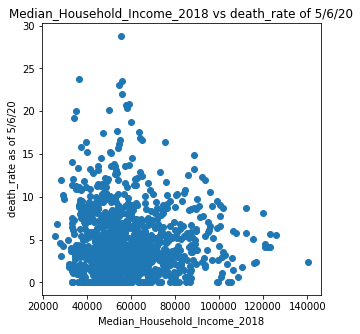

In [77]:
ftr_list = ['Median_Household_Income_2018']
plat_scatter_ftr_list(cases_filtered, ftr_list, y_col='death_rate')

This plot suggests an inverse relationship. While there is not a perfect correlation here, I think this suggests that median household income will be a good feature to use when predicting death rate.

### Age Features over Death Rate

In [78]:
cases_filtered['over_75_2010'] = ((cases_filtered['PopMale75-842010'] + cases_filtered['PopFmle75-842010']
                                  + cases_filtered['PopMale>842010'] + cases_filtered['PopFmle>842010']) / 
                                  cases_filtered['CensusPopulation2010'])

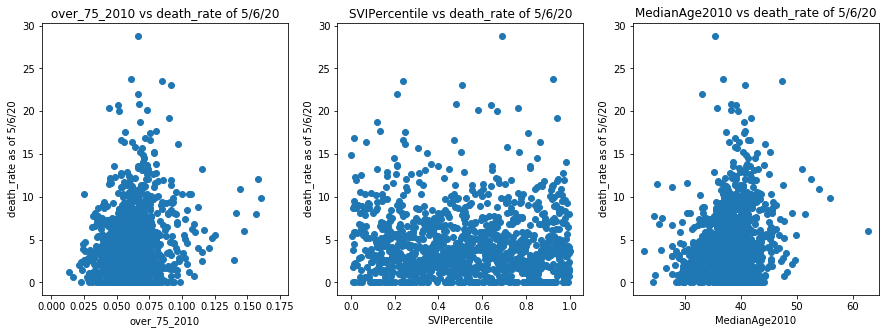

In [79]:
ftr_list = ['over_75_2010', 'SVIPercentile', 'MedianAge2010']
plat_scatter_ftr_list(cases_filtered, ftr_list, y_col='death_rate')

Based on this plot, age related features seem like relatively good features to use when trying to predict death rate. While the CDC's Social Vulnerability Index does not seem to have any correlation to death rate.

### Hospital Quality v.s. Death Rate

In [80]:
cases_filtered['pop_per_hos'] = cases_filtered['PopulationEstimate2018'] / (cases_filtered['#Hospitals'] + 1e-6)
cases_filtered['pop_per_icu'] = cases_filtered['PopulationEstimate2018'] / (cases_filtered['#ICU_beds'] + 1e-6)
cases_filtered['pop_per_ftehosp'] = cases_filtered['PopulationEstimate2018'] / (cases_filtered['#FTEHospitalTotal2017'] + 1e-6)

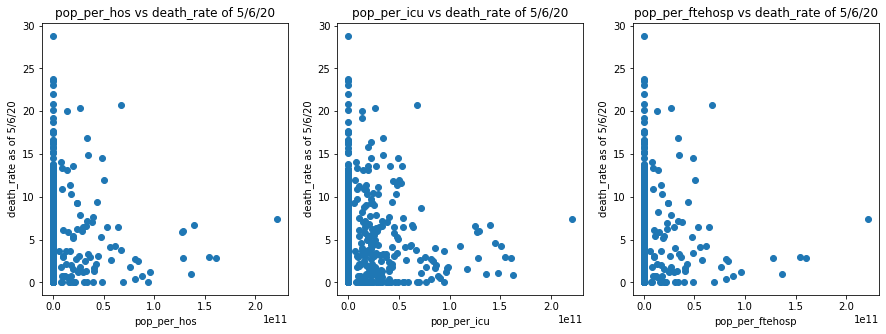

In [81]:
ftr_list = ['pop_per_hos', 'pop_per_icu', 'pop_per_ftehosp']
plat_scatter_ftr_list(cases_filtered, ftr_list, y_col='death_rate')

From the scatter plots above, hospital quality is slightly correlated to death rate. This can help our further model prediction.

### Healthcare v.s. Death Rate

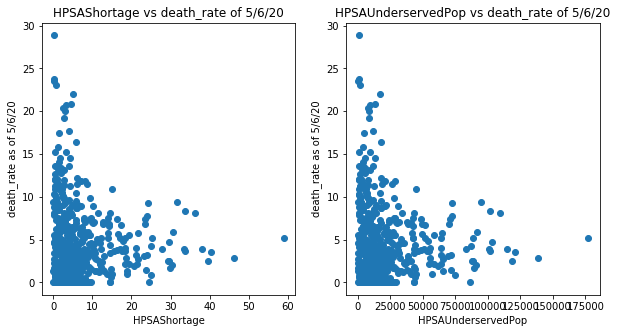

In [82]:
ftr_list = ['HPSAShortage', 'HPSAUnderservedPop']
plat_scatter_ftr_list(cases_filtered, ftr_list, y_col='death_rate')

Health Professional Shortage Area is correlated with death rate, therefore, more experiment can be conducted.

### Policies v.s. Death Rate

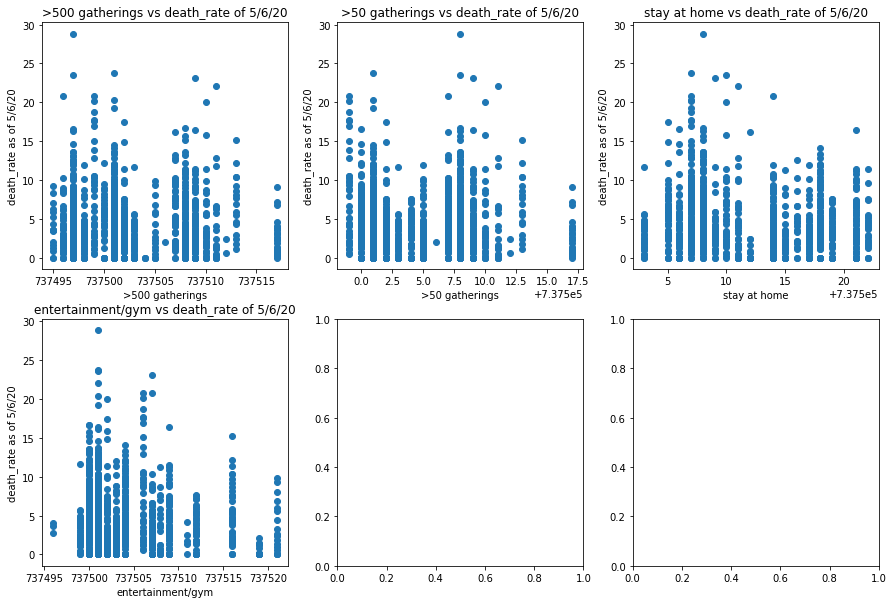

In [83]:
ftr_list = ['>500 gatherings', '>50 gatherings', 'stay at home', 'entertainment/gym']
plat_scatter_ftr_list(cases_filtered, ftr_list, y_col='death_rate')

Looks like policy data isn't closely correlate with death rate. Among them, seems stay at home and entertainment/gym are the most correlated. 

### Location v.s. Death Rate

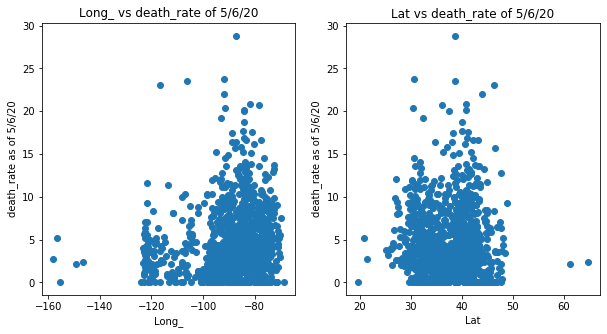

In [84]:
ftr_list = ['Long_', 'Lat']
plat_scatter_ftr_list(cases_filtered, ftr_list, y_col='death_rate')

Interestingly, geometric location seems to be useful for death rate prediction, that might because the latitude and longtitude can reflect whether the district is an crowded area or not.

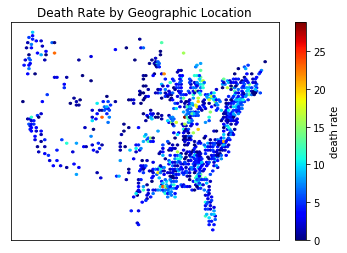

In [85]:
plt.hexbin(x = cases_filtered['lon'], y = cases_filtered['lat'], C = cases_filtered['death_rate'], cmap = 'jet')
plt.colorbar(label = 'death rate')
plt.title('Death Rate by Geographic Location')
plt.xticks([])
plt.yticks([]);

Here, we revisualize death rate as a function of geography. There appears to be higher rates along the Atlantic and Gulf Coasts, as well as in the Great Lakes region.

In [86]:
dr = cases_filtered[['FIPS', 
                     'death_rate', 
                     'pop_per_hos', 'pop_per_icu', 'pop_per_ftehosp',
                     'Lat', 'Long_',
                     'over_75_2010', 'MedianAge2010',
                     '#HospParticipatinginNetwork2017', 'HPSAShortage', 'HPSAUnderservedPop', 
                     '>500 gatherings', 'entertainment/gym', 'stay at home']].merge(
                    income, on = 'FIPS')

Now that we have found some good looking features, we will select them and investigate any missing values in these features.

In [87]:
dr.isna().sum()

FIPS                                 0
death_rate                           0
pop_per_hos                          0
pop_per_icu                          0
pop_per_ftehosp                      0
Lat                                  0
Long_                                0
over_75_2010                         0
MedianAge2010                        0
#HospParticipatinginNetwork2017      0
HPSAShortage                       559
HPSAUnderservedPop                 559
>500 gatherings                      7
entertainment/gym                    3
stay at home                        77
Median_Household_Income_2018         0
dtype: int64

In [88]:
dr = dr.fillna({'HPSAShortage' : 0, 'HPSAUnderservedPop' : 0})

After researching the meaning of these HPSA scores, missing scores are equivalent to a score of 0, since they signify that there is no shortage. So we will fill these missing values with 0s.

In [89]:
dr[['>500 gatherings', 'entertainment/gym', 'stay at home']] = (
    dr[['>500 gatherings', 'entertainment/gym', 'stay at home']].fillna(pd.datetime.toordinal(pd.Timestamp('5/7/20'))))

The missing values for policies mean that the county has not yet implemented this policy. To deal with this, we decided to fill these missing values with the day after the current date of analysis, 5/7/20. We found that this produced a better model than filling these values with 0s.

In [90]:
dr.isna().sum()

FIPS                               0
death_rate                         0
pop_per_hos                        0
pop_per_icu                        0
pop_per_ftehosp                    0
Lat                                0
Long_                              0
over_75_2010                       0
MedianAge2010                      0
#HospParticipatinginNetwork2017    0
HPSAShortage                       0
HPSAUnderservedPop                 0
>500 gatherings                    0
entertainment/gym                  0
stay at home                       0
Median_Household_Income_2018       0
dtype: int64

### 1.2.2 Feature Selection

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.base import clone

def rmse(pred, real):
    return np.sqrt(np.mean(np.square(pred - real)))

def single_rmse(model, X, y):
    model.fit(X, y)
    return rmse(model.predict(X), y)

def cross_validate_rmse(model, X, y):
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X[tr_ind], y[tr_ind])
        rmse_values.append(rmse(y[va_ind], model.predict(X[va_ind])))
    return np.mean(rmse_values)

def through_all_model(ftrs, dr):
  
    X = dr[ftrs].values
    y = dr['death_rate'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)
    
    lr = LinearRegression(normalize=True)
    lr_mse = cross_validate_rmse(lr, X_train, y_train)
    #print('lr rmse:', lr_mse)
    
    ridge = Ridge(alpha=0.5)
    ridge_mse = cross_validate_rmse(ridge, X_train, y_train)
    #print('ridge rmse:', ridge_mse)
    
    rfr = RandomForestRegressor(max_depth=10, random_state=42)
    rfr_mse = cross_validate_rmse(rfr, X_train, y_train)
    #print('random forest rmse:', rfr_mse)
    
    return lr_mse, ridge_mse, rfr_mse



In [92]:
ftrs = [
    'pop_per_hos', 
    'pop_per_icu', 
    'pop_per_ftehosp', 
    '#HospParticipatinginNetwork2017', # hospital quality features
    'Median_Household_Income_2018', # economic features
    'Lat', 'Long_', # geographical features
    'over_75_2010', 
    'MedianAge2010',# age features
    'HPSAShortage', 
    'HPSAUnderservedPop',  # healthcare features
    '>500 gatherings', 
    'entertainment/gym', 
    'stay at home', # policy features
]

In [93]:
lr_mse_list, ridge_mse_list, rfr_mse_list = [], [], []

for ftr in ftrs:
    lr_mse, ridge_mse, rfr_mse = through_all_model([ftr], dr)
    lr_mse_list.append(lr_mse)
    ridge_mse_list.append(ridge_mse)
    rfr_mse_list.append(rfr_mse)

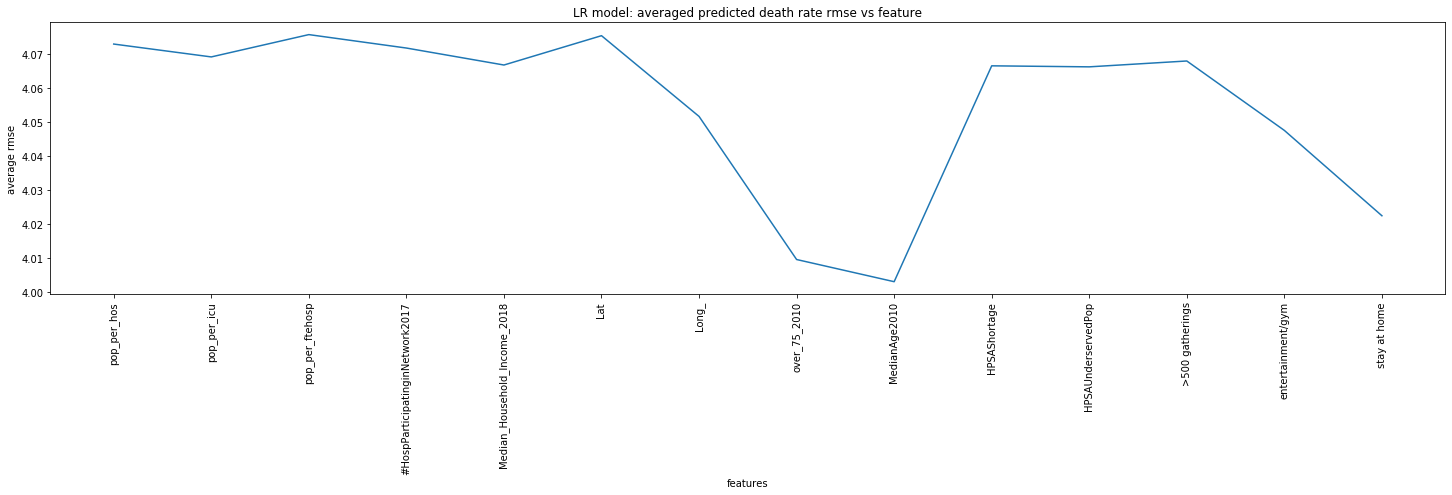

In [94]:
plt.figure(figsize = (25, 5))
plt.plot(lr_mse_list)
plt.title('LR model: averaged predicted death rate rmse vs feature')
plt.xlabel('features')
plt.xticks(ticks = range(len(ftrs)), labels = ftrs, rotation=90)
plt.ylabel('average rmse');

LR Model prefers the age feature a lot. This might because age features are more numerically correlated to death rate.

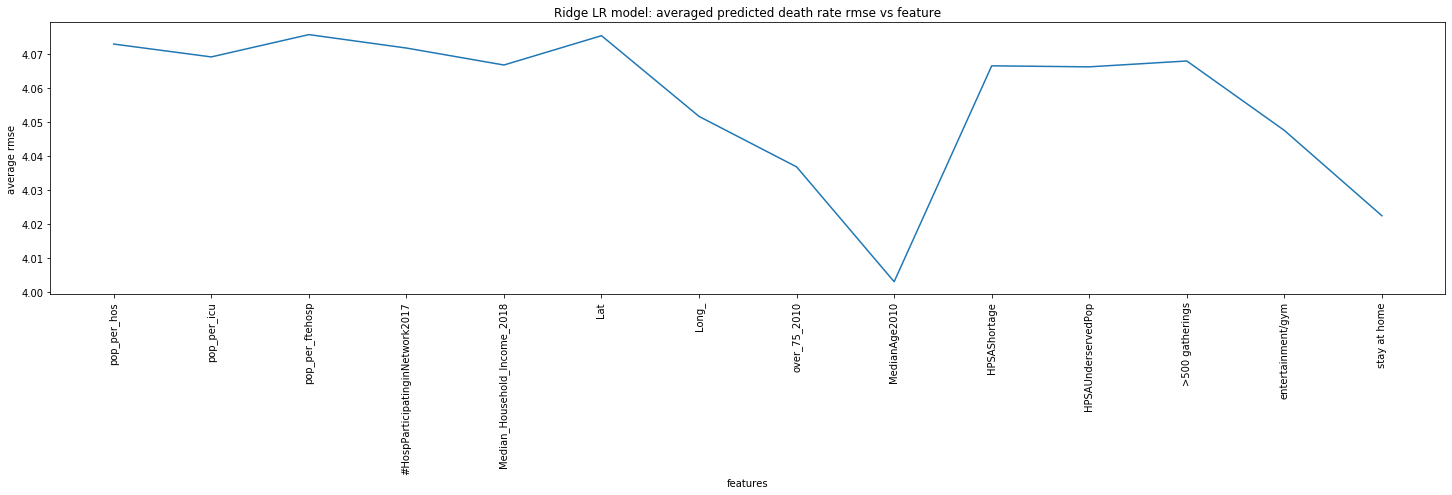

In [95]:
plt.figure(figsize = (25, 5))
plt.plot(ridge_mse_list)
plt.title('Ridge LR model: averaged predicted death rate rmse vs feature')
plt.xlabel('features')
plt.xticks(ticks = range(len(ftrs)), labels = ftrs, rotation=90)
plt.ylabel('average rmse');

Similar as linear model without ridge regularization, this model also prefer age features.

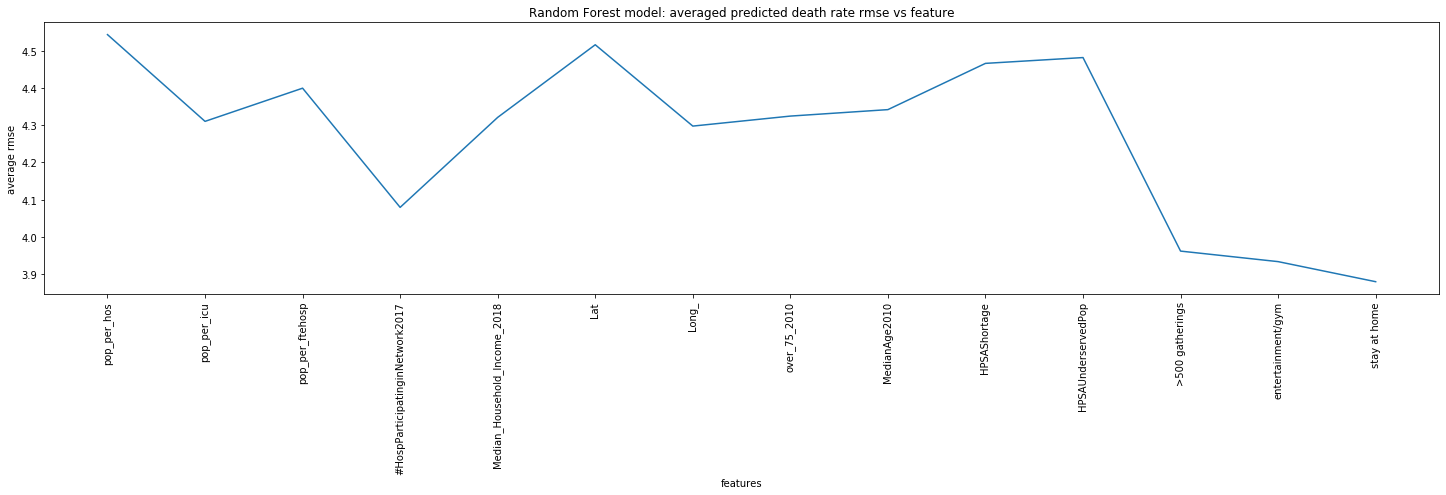

In [96]:
plt.figure(figsize = (25, 5))
plt.plot(rfr_mse_list)
plt.title('Random Forest model: averaged predicted death rate rmse vs feature')
plt.xlabel('features')
plt.xticks(ticks = range(len(ftrs)), labels = ftrs, rotation=90)
plt.ylabel('average rmse');

Random forest model prefers the policy data, as shown by the above figure. That might because that policy is important to decrease the death rate.

## 1.3 Regression Model

### 1.3.1 Model Selection

In [97]:
import itertools
def best_ftr_selection(ftrs, model, dr, min_no=11):
    best_ftrs = None
    y = dr['death_rate'].values
    min_mse = float('inf')
    
    for r in range(min_no, len(ftrs)):
        for comb in itertools.combinations(ftrs, r):
            keys = list(comb)
            X = dr[keys].values
            # check feature selection on the training part
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = .20, random_state=42)
            
            mse = single_rmse(model, X_train, y_train)
            if mse < min_mse:
                best_ftrs = comb
                min_mse = mse
    return best_ftrs, min_mse

In [98]:
y = dr['death_rate'].values
y_train, y_test = train_test_split(y, test_size = .20, random_state=42)

<b> Base Line: Mean Predictor</b>

In [99]:
print('mean predictor rmse:', rmse(np.mean(y_train)*np.ones(len(y_train)), y_train))

mean predictor rmse: 4.077498774862984


In [100]:
ftrs = [
    'pop_per_hos', 
    'pop_per_icu', 
    'pop_per_ftehosp', 
    '#HospParticipatinginNetwork2017', # hospital quality features
    'Median_Household_Income_2018', # economic features
    'Lat', 'Long_', # Geological features
    'over_75_2010', 
    'MedianAge2010',# age features
    'HPSAShortage', 
    'HPSAUnderservedPop',  # healthcare features
    '>500 gatherings', 
    'entertainment/gym', 
    'stay at home', # policy features
]


lr = LinearRegression(normalize=True)
ridge = Ridge(alpha=0.5)
rfr = RandomForestRegressor(max_depth=15, random_state=42)

In [101]:
%%time
lr_ftrs, min_mse = best_ftr_selection(ftrs, lr, dr)
lr_ftrs, min_mse

CPU times: user 1.66 s, sys: 13.6 ms, total: 1.67 s
Wall time: 898 ms


(('pop_per_hos',
  'pop_per_icu',
  'pop_per_ftehosp',
  'Median_Household_Income_2018',
  'Lat',
  'Long_',
  'over_75_2010',
  'MedianAge2010',
  'HPSAShortage',
  'HPSAUnderservedPop',
  '>500 gatherings',
  'entertainment/gym',
  'stay at home'),
 3.9221055456888645)

In [102]:
%%time
ri_ftrs, min_mse = best_ftr_selection(ftrs, ridge, dr)
ri_ftrs, min_mse

CPU times: user 1.46 s, sys: 13.4 ms, total: 1.48 s
Wall time: 779 ms


(('pop_per_icu',
  'pop_per_ftehosp',
  '#HospParticipatinginNetwork2017',
  'Median_Household_Income_2018',
  'Lat',
  'Long_',
  'over_75_2010',
  'MedianAge2010',
  'HPSAShortage',
  'HPSAUnderservedPop',
  '>500 gatherings',
  'entertainment/gym',
  'stay at home'),
 3.9247849105243513)

In [103]:
%%time
rfr_ftrs, min_mse = best_ftr_selection(ftrs, rfr, dr)
rfr_ftrs, min_mse

CPU times: user 3min 22s, sys: 1.4 s, total: 3min 23s
Wall time: 3min 24s


(('pop_per_hos',
  'pop_per_ftehosp',
  '#HospParticipatinginNetwork2017',
  'Median_Household_Income_2018',
  'Lat',
  'Long_',
  'over_75_2010',
  'HPSAShortage',
  'HPSAUnderservedPop',
  '>500 gatherings',
  'stay at home'),
 1.467152997183833)

In [104]:
# This is the only eliminated feature
set(ftrs)-set(rfr_ftrs)

{'MedianAge2010', 'entertainment/gym', 'pop_per_icu'}

From the result above, appearently Random Forest model outperforms all the others.

### 1.3.2 Hyper Parameters Tuning

In [105]:
# fetch the best feature combination
y = dr['death_rate']
X = dr[list(rfr_ftrs)].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .20, random_state=42)

In [106]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

rfr = RandomForestRegressor(random_state=42)
model_params = {
    # randomly sample numbers from 4 to 30 estimators
    'n_estimators': randint(4, 50),
    # randomly sample numbers from 2 to 20 for depth
    'max_depth': randint(2, 100),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
}

clf = RandomizedSearchCV(rfr, model_params, n_iter=100, cv=5, random_state=42)

# train the random search meta-estimator to find the best model out of 100 candidates
best_model = clf.fit(X_train, y_train)

CPU times: user 22 s, sys: 174 ms, total: 22.2 s
Wall time: 22.6 s


In [107]:
from pprint import pprint
pprint(best_model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 6,
 'max_features': 0.29018018248526467,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 35,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [108]:
print('model rmse:', rmse(best_model.predict(X_test), y_test))

model rmse: 3.204895359696429


### 1.3.3 Model Analysis

Feature ranking:
1. feature stay at home (0.174527)
2. feature over_75_2010 (0.144453)
3. feature Long_ (0.125394)
4. feature pop_per_hos (0.103748)
5. feature Median_Household_Income_2018 (0.101051)
6. feature Lat (0.089511)
7. feature HPSAUnderservedPop (0.075043)
8. feature HPSAShortage (0.068662)
9. feature pop_per_ftehosp (0.060123)
10. feature >500 gatherings (0.044830)
11. feature #HospParticipatinginNetwork2017 (0.012659)


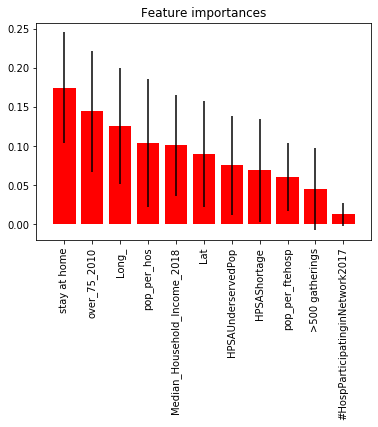

In [109]:
ftrs = list(rfr_ftrs)
importances = best_model.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.best_estimator_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = [ftrs[idx] for idx in indices]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, ftrs[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Supersinglt, longtitude is the most important feature while latitude is the third. The reason might be the geologic location can reflect whether the county is at crowded area. For example, coastal areas in the U.S. tend to be more densely populated.

While the others correspons our hypothesis well. The second important feature is <b>over_75_2010</b>, these people are now over 85 now, who are super vulunerable to the virus. The population per hospital is also important, as the more medical resources, the less likely the patients are to succumb to their illness. Among the policies, stay at home is the most important, which is intuitive.

## 1.4 Conclusion
Our best model achieves rmse of 3.15 compared 4.08 from the mean predictor! To conclude from the above feature analysis, importance of different features can be ranked as:
1. <b>Geological location feature</b>: Supersingly, longtitude is most important for death rate prediction. Maybe because it can reflect whether the county is a coastal area.
2. <b>Age feature</b>: Intuitively, people with older age is more vulunerable. And people in there 85+ are super dangerous.
3. The <b>hospital quality features</b>: Intuitively, hospital quality features should be the most close ones to death rate prediction.
4. <b>Economic feature</b>: Whether the patient can afford the treatment may also be important to predict death rate.
5. <b>Social distancing</b>: The date when stay at home order came into effect also has an impact on the model.
6. <b>HPSA feature</b>: The lack of health care put some people in danger. 

# 2 Number of New Case Prediction

# Question: Can we predict the current growth rate based on dates certain measures were taken?

## 2.1 Addtional Data Preprocessing

In [110]:
cases_filtered['stay at home'].value_counts(dropna = False)

737508.0    144
737507.0    131
737514.0    123
737518.0    114
NaN          77
737521.0     60
737505.0     55
737517.0     52
737506.0     49
737519.0     40
737509.0     40
737510.0     39
737511.0     38
737515.0     38
737503.0     34
737522.0     28
737516.0     23
737512.0     14
Name: stay at home, dtype: int64

In [111]:
measures = ['stay at home', '>50 gatherings', 'public schools', 'restaurant dine-in', 
            'entertainment/gym', 'federal guidelines']
for measure in measures:
    cases_filtered[measure] = cases_filtered[measure].fillna(737551).astype(int).apply(pd.Timestamp.fromordinal)

In [112]:
cur_date = pd.Timestamp('5/6/20')
for measure in measures:
    cases_filtered[f'days since {measure}'] = cases_filtered[measure].apply(lambda x : (cur_date - x).days)

In [113]:
cases_filtered['days since stay at home'].value_counts()
cases_filtered['5/6/20'] = cases_filtered['cur_cases']

In [114]:
def rmse(pred, real):
    return np.sqrt(np.mean(np.square(pred - real)))

In [115]:
X = cases_filtered.loc[:, '4/25/20': '5/5/20']
y = cases_filtered.loc[:, '5/6/20']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 99)

In [117]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
rmse(lr.predict(X_test), y_test)

25.789441310789353

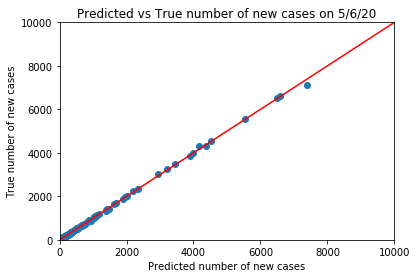

In [121]:
plt.scatter(lr.predict(X_test), y_test)
plt.plot(np.arange(10000), np.arange(10000), color = 'r')
plt.xlim([0, 10000])
plt.ylim([0, 10000])
plt.title('Predicted vs True number of new cases on 5/6/20')
plt.xlabel('Predicted number of new cases')
plt.ylabel('True number of new cases');

This figure suggests that we can use a simple linear model to predict new case counts on a given day based on previous days.

## 2.2 Feature and Model Selection

In [125]:
from sklearn.model_selection import KFold
from sklearn.base import clone

In [126]:
def prepare_data(data, pred_date, num_days, extra_features = None):
    
    t = pd.Timestamp(pred_date).strftime('%-m/%-d/%y')
    if t not in data.columns:
        return 'invalid date'
    
    t_1 = pd.Timestamp(pd.Timestamp(pred_date) - pd.DateOffset(1)).strftime('%-m/%-d/%y')
    t_2 = pd.Timestamp(pd.Timestamp(pred_date) - pd.DateOffset(2)).strftime('%-m/%-d/%y')
    t_n = pd.Timestamp(pd.Timestamp(pred_date) - pd.DateOffset(num_days)).strftime('%-m/%-d/%y')
    t_n1 = pd.Timestamp(pd.Timestamp(pred_date) - pd.DateOffset(num_days+1)).strftime('%-m/%-d/%y')
    
    X = np.array(data.loc[:, t_n: t_1]) - np.array(data.loc[:, t_n1: t_2])
    y = np.array(data.loc[:, t]) - np.array(data.loc[:, t_1])
    
    if extra_features is not None:
        X = np.hstack((X, np.array(data[extra_features].fillna(0))))
    
    return X, y

In [127]:
X, y = prepare_data(cases_filtered, '05/6/20', 5)
X.shape, y.shape

((1099, 5), (1099,))

best rmse: 74.20329380943019
best num days 1


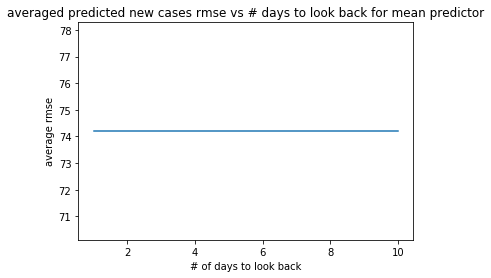

In [128]:
from sklearn.dummy import DummyRegressor
mean_pred = DummyRegressor()
cv_rmses = []
for num_days in np.arange(1, 11, 1):
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases_filtered, pred_date, num_days)
        cur_rmse += cross_validate_rmse(mean_pred, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best num days', np.argmin(cv_rmses)+1)

plt.plot(np.arange(1, 11, 1), cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for mean predictor')
plt.xlabel('# of days to look back')
plt.ylabel('average rmse');

best rmse: 32.561697429602305
best num days 5


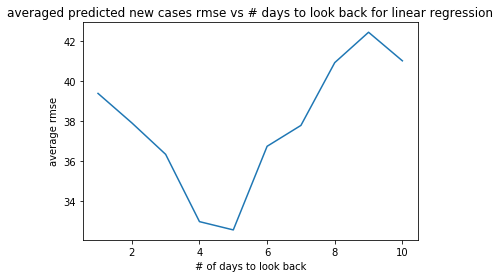

In [129]:
# cross validate num days on a couple different pred dates
cv_rmses = []
for num_days in np.arange(1, 11, 1):
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases_filtered, pred_date, num_days)
        cur_rmse += cross_validate_rmse(lr, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best num days', np.argmin(cv_rmses)+1)

plt.plot(np.arange(1, 11, 1), cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for linear regression')
plt.xlabel('# of days to look back')
plt.ylabel('average rmse');

best rmse: 46.72745830973993
best num days 7


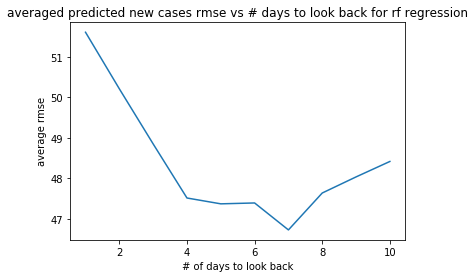

In [130]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv_rmses = []
for num_days in np.arange(1, 11, 1):
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases_filtered, pred_date, num_days)
        cur_rmse += cross_validate_rmse(rf, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best num days', np.argmin(cv_rmses)+1)

plt.plot(np.arange(1, 11, 1), cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for rf regression')
plt.xlabel('# of days to look back')
plt.ylabel('average rmse');

best rmse: 32.53511419231264
best feature PopulationDensityperSqMile2010


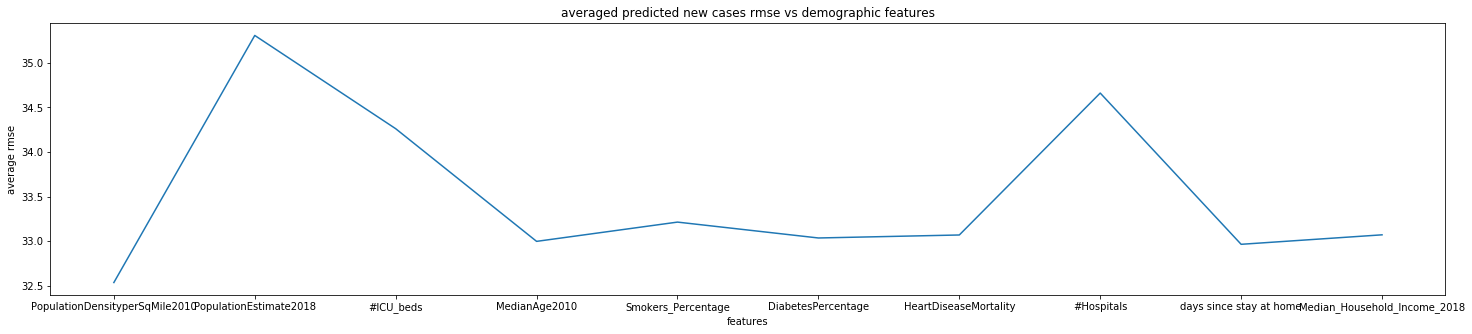

In [131]:
lr = LinearRegression(normalize = True)
cv_rmses = []
features = ['PopulationDensityperSqMile2010',
            'PopulationEstimate2018',
            '#ICU_beds',
            'MedianAge2010',
            'Smokers_Percentage',
            'DiabetesPercentage',
            'HeartDiseaseMortality',
            '#Hospitals',
            'days since stay at home',
            'Median_Household_Income_2018']
for feature in features:
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases_filtered, pred_date, 4, [feature])
        cur_rmse += cross_validate_rmse(lr, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best feature', features[np.argmin(cv_rmses)])

plt.figure(figsize = (25, 5))
plt.plot(cv_rmses)
plt.title('averaged predicted new cases rmse vs demographic features')
plt.xlabel('features')
plt.xticks(ticks = range(len(features)), labels = features)
plt.ylabel('average rmse');

best rmse: 47.11247406419743
best feature Smokers_Percentage
CPU times: user 53.5 s, sys: 805 ms, total: 54.3 s
Wall time: 56.9 s


Text(0, 0.5, 'average rmse')

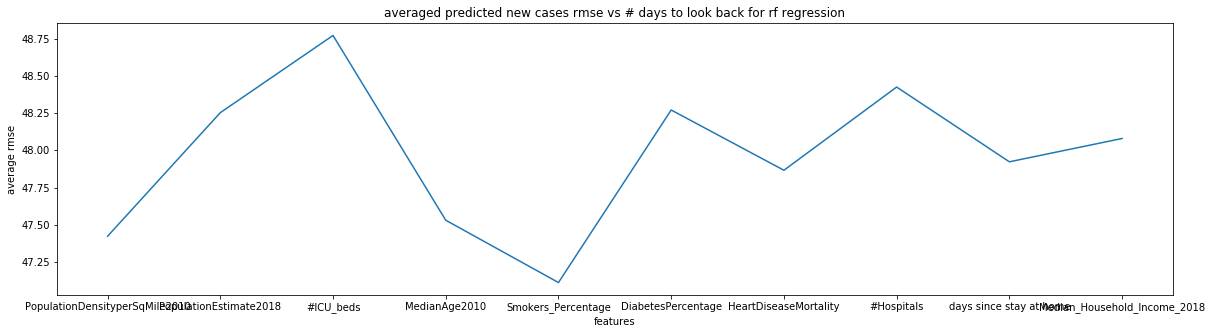

In [132]:
%%time
cv_rmses = []
for feature in features:
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases_filtered, pred_date, 4, [feature])
        cur_rmse += cross_validate_rmse(rf, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best feature', features[np.argmin(cv_rmses)])

plt.figure(figsize = (20, 5))
plt.plot(cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for rf regression')
plt.xlabel('features')
plt.xticks(ticks = range(len(features)), labels = features)
plt.ylabel('average rmse');

best rmse: 32.53511419231264
best feature PopulationDensityperSqMile2010


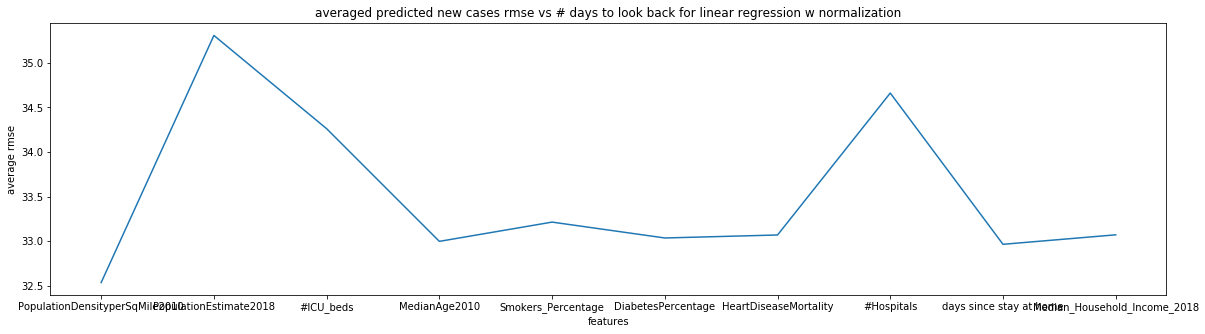

In [133]:
lr = LinearRegression(normalize = True)
cv_rmses = []
for feature in features:
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases_filtered, pred_date, 4, [feature])
        cur_rmse += cross_validate_rmse(lr, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best feature', features[np.argmin(cv_rmses)])

plt.figure(figsize = (20, 5))
plt.plot(cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for linear regression w normalization')
plt.xlabel('features')
plt.xticks(ticks = range(len(features)), labels = features)
plt.ylabel('average rmse');

In [134]:
best_features = []
cur_rmse = 0
for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
    X, y = prepare_data(cases_filtered, pred_date, 4, best_features)
    cur_rmse += cross_validate_rmse(lr, X, y)
print('rmse for selcted features:', cur_rmse/5)

rmse for selcted features: 32.97589195123237


In [135]:
best_features = ['MedianAge2010', 'Long_']
cur_rmse = 0
for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
    X, y = prepare_data(cases_filtered, pred_date, 4, best_features)
    cur_rmse += cross_validate_rmse(lr, X, y)
print('rmse for selcted features:', cur_rmse/5)

rmse for selcted features: 32.93135937788968


In [136]:
best_features = []
cur_rmse = 0
for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
    X, y = prepare_data(cases_filtered, pred_date, 5, best_features)
    cur_rmse += cross_validate_rmse(rf, X, y)
print('rmse for selcted features rf:', cur_rmse/5)

rmse for selcted features rf: 47.21486262468055


In [137]:
best_features = ['PopulationDensityperSqMile2010', 'MedianAge2010', 'Smokers_Percentage', 'days since stay at home']
cur_rmse = 0
for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
    X, y = prepare_data(cases_filtered, pred_date, 5, best_features)
    cur_rmse += cross_validate_rmse(rf, X, y)
print('rmse for selcted features rf:', cur_rmse/5)

rmse for selcted features rf: 46.78260538110386


Generally speaking, LR model outperforms random forest model because the next new case prediction is more like a linear problem. For features, using MedianAge2010 and Long_ plus four previous days gives the best result.

## 2.2 Best Model 

In [104]:
best_features = ['MedianAge2010', 'Long_']
X, y = prepare_data(cases_filtered, pred_date, 4, best_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

In [108]:
# benchmark
mean_pred = DummyRegressor()

mean_pred.fit(X_train, y_train)
print('model rmse:', rmse(mean_pred.predict(X_test), y_test))

model rmse: 39.629553796263075


In [109]:
%%time
ridge = Ridge()
model_params = {
    # randomly sample numbers from 2 to 20 for depth
    'max_iter': randint(2, 1000),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'alpha': truncnorm(a=0, b=3, loc=0.25, scale=0.1),
}

clf = RandomizedSearchCV(ridge, model_params, n_iter=100, cv=5, random_state=42)

# train the random search meta-estimator to find the best model out of 100 candidates
best_model = clf.fit(X_train, y_train)

CPU times: user 438 ms, sys: 0 ns, total: 438 ms
Wall time: 446 ms


In [110]:
pprint(best_model.best_estimator_.get_params())

{'alpha': 0.46852104116757914,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 784,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}


In [111]:
print('model rmse:', rmse(best_model.predict(X_test), y_test))

model rmse: 16.474576844342643


## 2.3 bias from counties with large number of cases?

In [92]:
cases_filtered['5/6/20'].describe()

count      1100.000000
mean       1084.544545
std        6176.110588
min          51.000000
25%          89.750000
50%         183.500000
75%         517.250000
max      178351.000000
Name: 5/6/20, dtype: float64

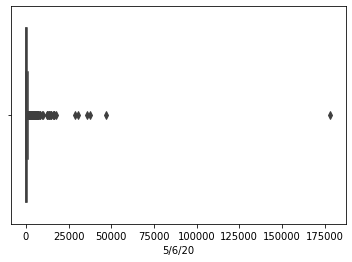

In [93]:
sns.boxplot(cases_filtered['5/6/20'])

In [94]:
X, y = prepare_data(cases_filtered, '5/6/20', 4)
cur_rmse = cross_validate_rmse(lr, X, y)
print('cv rmse for all counties:', cur_rmse)

cv rmse for all counties: 24.682491975382614


In [95]:
X, y = prepare_data(cases_filtered[cases_filtered['5/6/20'] < 25000], '5/6/20', 4)
cur_rmse = cross_validate_rmse(lr, X, y)
print('cv rmse for counties with cases < 25000:', cur_rmse)

cv rmse for counties with cases < 25000: 23.212747147520247


In [96]:
X, y = prepare_data(cases_filtered[cases_filtered['5/6/20'] < 1000], '5/6/20', 4)
cur_rmse = cross_validate_rmse(lr, X, y)
print('cv rmse for counties with cases < 1000:', cur_rmse)

cv rmse for counties with cases < 1000: 10.851160385347612


In [97]:
X, y = prepare_data(cases_filtered[(cases_filtered['5/6/20'] < 1000) & cases_filtered['5/6/20'] > 0], '5/6/20', 4)
cur_rmse = cross_validate_rmse(lr, X, y)
print('cv rmse for counties with cases 0 < x < 1000:', cur_rmse)

cv rmse for counties with cases 0 < x < 1000: 12.618496810376637


In [98]:
X, y = prepare_data(cases_filtered, '5/6/20', 4)
pd.Series(y).describe()

count    1100.000000
mean       22.249091
std        79.473757
min        -9.000000
25%         1.000000
50%         4.000000
75%        15.000000
max      1477.000000
dtype: float64

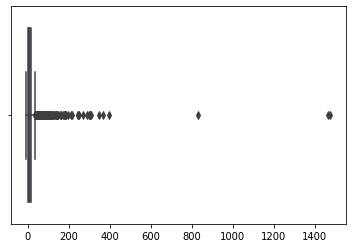

In [99]:
sns.boxplot(y)

## 2.4 Conclusion